## Practical Lab 1 - Univariate Linear Regression on the California Housing Prices Dataset
*Submitted by Bhupesh Kumar*

### Introduction

This report explores the relationships between California's median house value and three potential predictors: **median income**, **population**, and **number of households**. I have build separate univariate linear regression models for each variable to assess their predictive power.

### Problem Statement
Predicting housing prices is crucial for various stakeholders, including government agencies, investors, and real estate developers. A strong predictor will allow us to forecast price trends, make informed investment decisions, and plan infrastructure accordingly.

By focusing on three key predictors, my aim is to identify the strongest factor that explains the variation in housing prices.

### Step 1: Framing the Problem

The goal of this analysis is to build a predictive model for **California's median house value** using three independent variables:
1. **Median income** 
2. **Population** 
3. **Number of households** 

My aim is to identify which of these variables has the strongest predictive power by evaluating the models performance through error metrics like Mean Squared Error (MSE) and Mean Absolute Error (MAE). This will help me to determine the most reliable predictor for housing prices.

### Step 2: Getting the Data

I am using the **California Housing Prices Dataset** from [Kaggle](https://www.kaggle.com/datasets/camnugent/california-housing-prices), which contains housing and demographic data across California. The dataset will be loaded into a Pandas DataFrame for analysis.

In [295]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import linear_model
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [296]:
# Load the dataset
data = pd.read_csv('./data/housing.csv')

In [297]:
# Display the first few rows of the dataset
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [298]:
data.shape

(20640, 10)

### Step 3: Exploratory Data Analysis (EDA)
Before fitting models, it's essential to explore the dataset to understand the distributions, correlations, and potential outliers. This helps us build more informed models later on.

- 3.1 **Summary Statistics**: 
I began by inspecting the dataset using descriptive statistics to understand the range, mean, and variation of each variable, which provides an initial sense of their relationships.

In [299]:
# Get summary statistics of the dataset
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


- 3.2 **Scatter Plot Analysis**:
Visualizing data is crucial to understanding the relationships between variables. Scatter plots help us identify trends, correlations, or potential outliers. For example, if two variables show a linear pattern in a scatter plot, it suggests that one may predict the other well through linear regression.

I have created three scatter plots to visualize the relationships between the following variables:
    
- Median income vs. Median house value

The strong positive correlation suggests that median income will be a key predictor in our regression model.

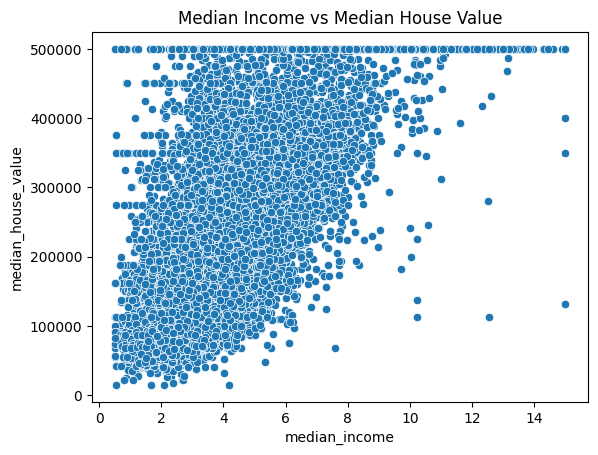

In [300]:
# Scatter plot: Median Income vs Median House Value
sns.scatterplot(x='median_income', y='median_house_value', data=data)
plt.title('Median Income vs Median House Value')

plt.show()

- Population vs. Median house value

The lack of a clear trend indicates that population size is unlikely to be a significant predictor.

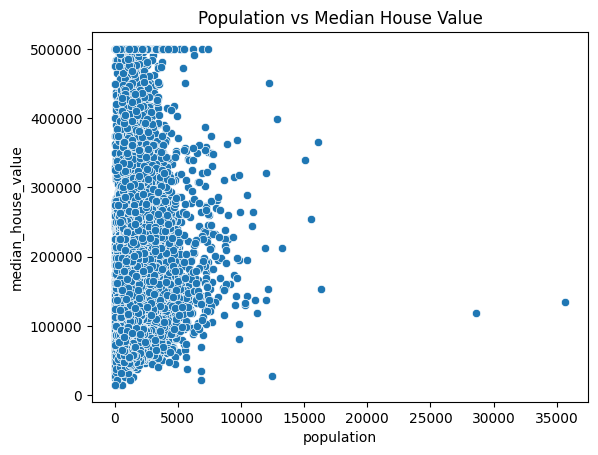

In [301]:
# Scatter plot: Population vs Median House Value
sns.scatterplot(x='population', y='median_house_value', data=data)
plt.title('Population vs Median House Value')

plt.show()

- Households vs. Median house value

The weak positive correlation implies that the number of households may not contribute substantial predictive power in our model.

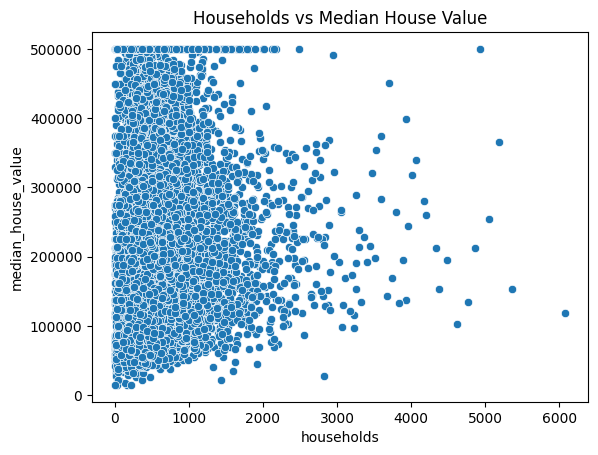

In [302]:
# Scatter plot: Households vs Median House Value
sns.scatterplot(x='households', y='median_house_value', data=data)
plt.title('Households vs Median House Value')

plt.show()

- 3.3 Variable Descriptions

   1. **Median House Value**:
      - This variable indicates the median price of homes in a specific area and serves as the dependent variable in our analysis, typically ranging from $14,999 to $500,001. It is essential for assessing housing affordability. Also, the scatter plot shows that median income is capped at $500,001, which may limit the model's ability to predict house values in high-income regions accurately.

   2. **Median Income**:
      - Median income for households within a block of houses (measured in tens of thousands of US Dollars), ranging from $5,000 to $150,000. It shows a strong positive correlation with median house values, suggesting that higher incomes lead to higher property prices.

   3. **Population**:
      - This variable indicates the total number of people residing within a block and it ranges from 3 to 35,682. Although it may imply housing demand, its correlation with median house values is weaker.

   4. **Number of Households**:
      - The number of households reflects the total count of households in the area, ranging from 1 to 6,082. While it shows a minor positive relationship with house values, it is less influential as a predictor compared to median income.


### Data Preprocessing

Filter out records with median_house_value = 500001 since it seems to be a cap for the median_house_value.

In [303]:
housing_data_preprocessed = data[data.median_house_value != 500001]

In [304]:
print(f"After filtering, there are {len(housing_data_preprocessed)} records, versus {len(data)} before filtering")

After filtering, there are 19675 records, versus 20640 before filtering


Let's plot the same scatterplots one more time to visualize the difference.

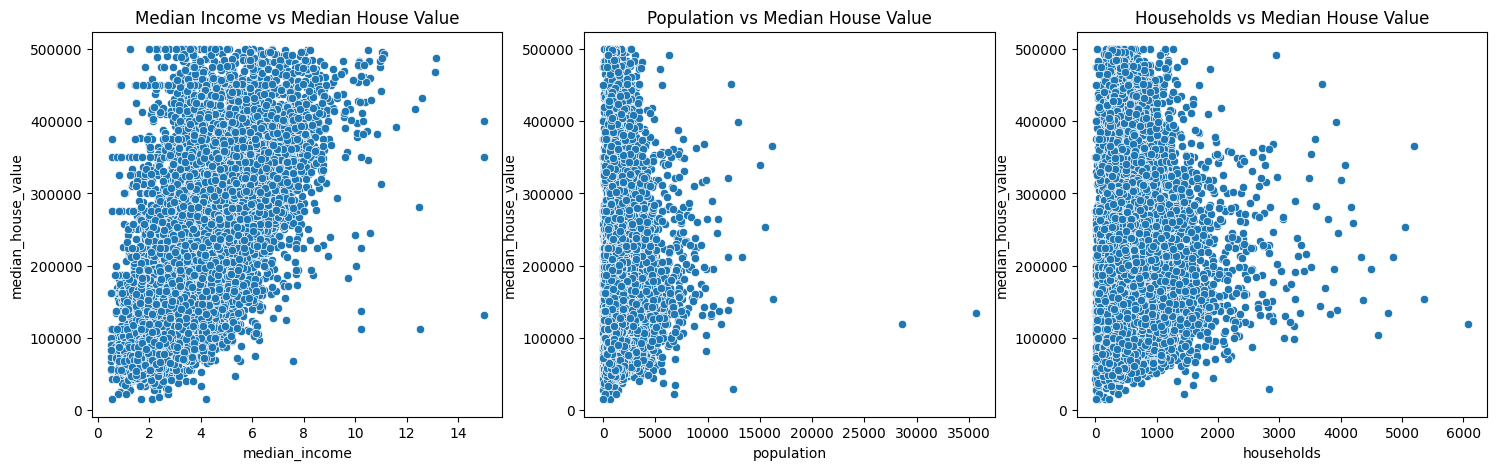

In [305]:
# Set the figure size for the plots
plt.figure(figsize=(18, 5))

# Scatter plot: Median Income vs Median House Value
plt.subplot(1, 3, 1)
sns.scatterplot(x='median_income', y='median_house_value', data=housing_data_preprocessed)
plt.title('Median Income vs Median House Value')

# Scatter plot: Population vs Median House Value
plt.subplot(1, 3, 2)
sns.scatterplot(x='population', y='median_house_value', data=housing_data_preprocessed)
plt.title('Population vs Median House Value')

# Scatter plot: Households vs Median House Value
plt.subplot(1, 3, 3)
sns.scatterplot(x='households', y='median_house_value', data=housing_data_preprocessed)
plt.title('Households vs Median House Value')

plt.show()

### Step 4: Model Fitting

Linear regression is a fundamental machine learning algorithm used to model the relationship between two variables. In this case, we're modeling the relationship between median house value (dependent variable) and each of the independent variables (median income, population, and households).

For each variable, we’ll fit a separate linear regression model to assess its predictive power.

For each model, we will calculate:

- The intercept: This will tells us the base price of a house if the factor is zero.
- The slope: This will show how much the house price changes for each unit increase in the factor (e.g., for every extra dollar in income, how much more the house costs).
- The Mean Squared Error (MSE) and Mean Absolute Error (MAE): These are numbers that will tell us how far off our predictions are from the actual house prices. Lower values mean the model is better.

### Train-Test Split

We'll split the data into training (80%) and testing (20%) sets to evaluate the model's performance accurately.

In [306]:
# Splitting data into training (80%) and testing (20%) sets
train_size = int(len(housing_data_preprocessed) * 0.8)
train_data = housing_data_preprocessed[:train_size]
test_data = housing_data_preprocessed[train_size:]

In [307]:
len(train_data), len(test_data)

(15740, 3935)

- 4.1 Median Income vs Median House Value
    
    We begin by fitting a linear regression model to median income and median house value.

    We train a linear regression model using the training data and evaluate its performance on both training and test sets.

In [308]:
# Training the model with median_income
model_income = linear_model.LinearRegression()
model_income.fit(train_data[['median_income']], train_data['median_house_value'])

LinearRegression()

In [309]:
# Predicting house values for training and test sets
y_train_pred_income = model_income.predict(train_data[['median_income']])
y_test_pred_income = model_income.predict(test_data[['median_income']])

In [310]:
# Calculating MSE and MAE for training and test sets
train_mse_income = mean_squared_error(train_data['median_house_value'], y_train_pred_income)
train_mae_income = mean_absolute_error(train_data['median_house_value'], y_train_pred_income)

test_mse_income = mean_squared_error(test_data['median_house_value'], y_test_pred_income)
test_mae_income = mean_absolute_error(test_data['median_house_value'], y_test_pred_income)

In [311]:
# Displaying results
print("Model: Median Income vs Median House Value")
print("Training Set - Intercept:", model_income.intercept_, "Slope:", model_income.coef_[0])
print("Training MSE:", train_mse_income, "Training MAE:", train_mae_income)
print("Testing MSE:", test_mse_income, "Testing MAE:", test_mae_income)

Model: Median Income vs Median House Value
Training Set - Intercept: 48204.534368169785 Slope: 38702.97233842378
Training MSE: 5557954319.259176 Training MAE: 55839.99864072871
Testing MSE: 5831038297.419372 Testing MAE: 59961.60099129183


- 4.2 Population vs Median House Value
    
    Next, we apply linear regression between population and median house value.

In [312]:
# Training the model with population
model_population = linear_model.LinearRegression()
model_population.fit(train_data[['population']], train_data['median_house_value'])

LinearRegression()

In [313]:
# Predicting house values for training and test sets
y_train_pred_population = model_population.predict(train_data[['population']])
y_test_pred_population = model_population.predict(test_data[['population']])

In [314]:
# Calculating MSE and MAE for training and test sets
train_mse_population = mean_squared_error(train_data['median_house_value'], y_train_pred_population)
train_mae_population = mean_absolute_error(train_data['median_house_value'], y_train_pred_population)

test_mse_population = mean_squared_error(test_data['median_house_value'], y_test_pred_population)
test_mae_population = mean_absolute_error(test_data['median_house_value'], y_test_pred_population)

In [315]:
# Displaying results
print("\nModel: Population vs Median House Value")
print("Training Set - Intercept:", model_population.intercept_, "Slope:", model_population.coef_[0])
print("Training MSE:", train_mse_population, "Training MAE:", train_mae_population)
print("Testing MSE:", test_mse_population, "Testing MAE:", test_mae_population)


Model: Population vs Median House Value
Training Set - Intercept: 188081.58862583563 Slope: 0.3286297271249774
Training MSE: 9236185598.969007 Training MAE: 75879.52660618868
Testing MSE: 10863782849.78328 Testing MAE: 85178.9089807831


- 4.3 Households vs Median House Value

    Finally, we fit a model to predict median house value using the number of households.

In [316]:
# Training the model with number of households
model_households = linear_model.LinearRegression()
model_households.fit(train_data[['households']], train_data['median_house_value'])

LinearRegression()

In [317]:
# Predicting house values for training and test sets
y_train_pred_households = model_households.predict(train_data[['households']])
y_test_pred_households = model_households.predict(test_data[['households']])

In [318]:
# Calculating MSE and MAE for training and test sets
train_mse_households = mean_squared_error(train_data['median_house_value'], y_train_pred_households)
train_mae_households = mean_absolute_error(train_data['median_house_value'], y_train_pred_households)

test_mse_households = mean_squared_error(test_data['median_house_value'], y_test_pred_households)
test_mae_households = mean_absolute_error(test_data['median_house_value'], y_test_pred_households)

In [319]:
# Displaying results
print("\nModel: Number of Households vs Median House Value")
print("Training Set - Intercept:", model_households.intercept_, "Slope:", model_households.coef_[0])
print("Training MSE:", train_mse_households, "Training MAE:", train_mae_households)
print("Testing MSE:", test_mse_households, "Testing MAE:", test_mae_households)


Model: Number of Households vs Median House Value
Training Set - Intercept: 177147.28853834848 Slope: 22.625725908661156
Training MSE: 9156895298.287685 Training MAE: 75463.10651473372
Testing MSE: 10759278800.526697 Testing MAE: 84503.1472350856


In [320]:
# Creating a table for the results
results = pd.DataFrame({
    'Model': ['Median Income', 'Population', 'Households'],
    'Intercept': [model_income.intercept_, model_population.intercept_, model_households.intercept_],
    'Slope': [model_income.coef_[0], model_population.coef_[0], model_households.coef_[0]],
    'Training MSE': [train_mse_income, train_mse_population, train_mse_households],
    'Testing MSE': [test_mse_income, test_mse_population, test_mse_households],
    'Training MAE': [train_mae_income, train_mae_population, train_mae_households],
    'Testing MAE': [test_mae_income, test_mae_population, test_mae_households]
})
print(results)

           Model      Intercept         Slope  Training MSE   Testing MSE  \
0  Median Income   48204.534368  38702.972338  5.557954e+09  5.831038e+09   
1     Population  188081.588626      0.328630  9.236186e+09  1.086378e+10   
2     Households  177147.288538     22.625726  9.156895e+09  1.075928e+10   

   Training MAE   Testing MAE  
0  55839.998641  59961.600991  
1  75879.526606  85178.908981  
2  75463.106515  84503.147235  


### Step 5: Model Comparison

| Model          | Intercept       | Slope          | Training MSE      | Testing MSE       | Training MAE     | Testing MAE      |
|----------------|-----------------|----------------|-------------------|-------------------|------------------|------------------|
| Median Income  | 48204.53        | 38702.97       | 5.56e+09          | 5.83e+09          | 55840.00         | 59961.60         |
| Population     | 188081.59       | 0.33           | 9.24e+09          | 1.09e+10          | 75879.53         | 85178.91         |
| Households     | 177147.29       | 22.63          | 9.16e+09          | 1.08e+10          | 75463.11         | 84503.15         |


### Step 6: Visualizing the Regression Lines

A crucial step in model interpretation is visualizing the regression line superimposed on the scatter plots. This helps us see how well the model captures the relationship between the independent and dependent variables.

- 6.1 Median Income vs Median House Value

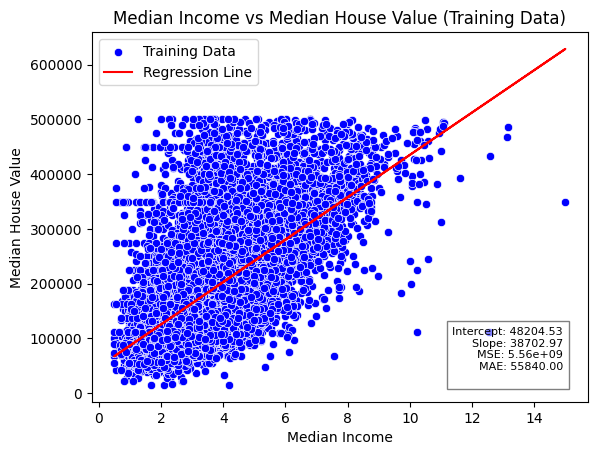

In [321]:
# Plotting the regression line on the training data
sns.scatterplot(x='median_income', y='median_house_value', data=train_data, color='blue', label='Training Data')
plt.plot(train_data['median_income'], y_train_pred_income, color='red', label='Regression Line')
plt.title("Median Income vs Median House Value (Training Data)")

# Prepare the text for annotation
annotation_text = (f'Intercept: {model_income.intercept_:.2f}\n'
                   f'Slope: {model_income.coef_[0]:.2f}\n'
                   f'MSE: {train_mse_income:.2e}\n'
                   f'MAE: {train_mae_income:.2f}\n')

# Add annotation to the plot
plt.text(0.95, 0.05, annotation_text, fontsize=8, ha='right', va='bottom', transform=plt.gca().transAxes, bbox=dict(facecolor='white', alpha=0.5))

plt.xlabel("Median Income")
plt.ylabel("Median House Value")
plt.legend()
plt.show()

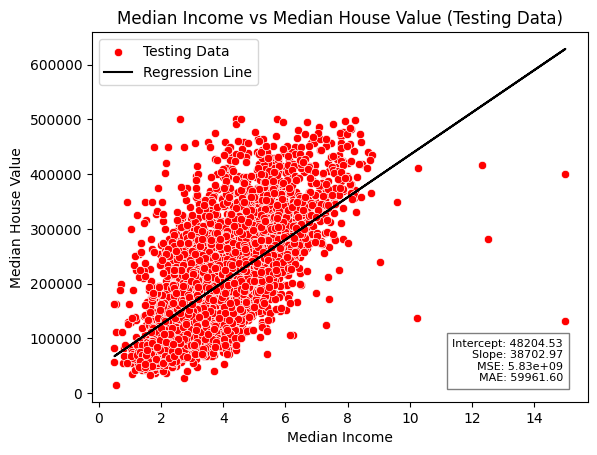

In [322]:

# Plotting the regression line on the test data
sns.scatterplot(x='median_income', y='median_house_value', data=test_data, color='red', label='Testing Data')
plt.plot(test_data['median_income'], y_test_pred_income, color='black', label='Regression Line')
plt.title("Median Income vs Median House Value (Testing Data)")

# Prepare the text for annotation
annotation_text = (f'Intercept: {model_income.intercept_:.2f}\n'
                   f'Slope: {model_income.coef_[0]:.2f}\n'
                   f'MSE: {test_mse_income:.2e}\n'
                   f'MAE: {test_mae_income:.2f}')

# Add annotation to the plot
plt.text(0.95, 0.05, annotation_text, fontsize=8, ha='right', va='bottom', transform=plt.gca().transAxes, bbox=dict(facecolor='white', alpha=0.5))

plt.xlabel("Median Income")
plt.ylabel("Median House Value")
plt.legend()
plt.show()

- 6.2 Population vs Median House Value
    
    Next, we apply linear regression between population and median house value.

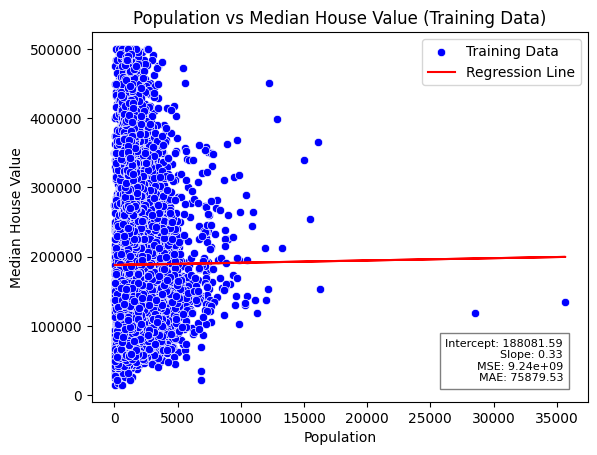

In [323]:
# Plotting the regression line on the training data
sns.scatterplot(x='population', y='median_house_value', data=train_data, color='blue', label='Training Data')
plt.plot(train_data['population'], y_train_pred_population, color='red', label='Regression Line')
plt.title("Population vs Median House Value (Training Data)")

# Prepare the text for annotation
annotation_text = (f'Intercept: {model_population.intercept_:.2f}\n'
                   f'Slope: {model_population.coef_[0]:.2f}\n'
                   f'MSE: {train_mse_population:.2e}\n'
                   f'MAE: {train_mae_population:.2f}')

# Add annotation to the plot
plt.text(0.95, 0.05, annotation_text, fontsize=8, ha='right', va='bottom', transform=plt.gca().transAxes, bbox=dict(facecolor='white', alpha=0.5))

plt.xlabel("Population")
plt.ylabel("Median House Value")
plt.legend()
plt.show()

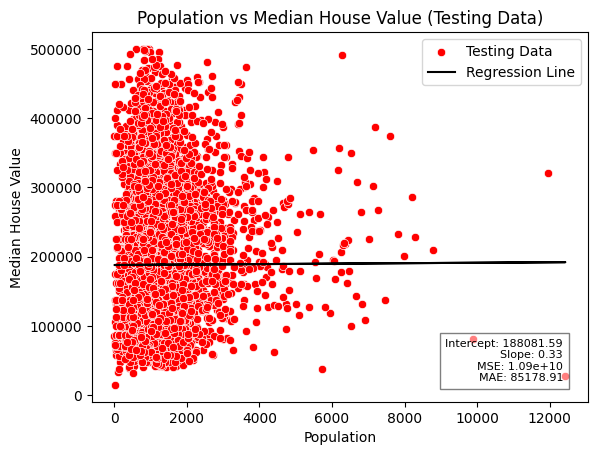

In [324]:
# Plotting the regression line on the test data
sns.scatterplot(x='population', y='median_house_value', data=test_data, color='red', label='Testing Data')
plt.plot(test_data['population'], y_test_pred_population, color='black', label='Regression Line')
plt.title("Population vs Median House Value (Testing Data)")

# Prepare the text for annotation
annotation_text = (f'Intercept: {model_population.intercept_:.2f}\n'
                   f'Slope: {model_population.coef_[0]:.2f}\n'
                   f'MSE: {test_mse_population:.2e}\n'
                   f'MAE: {test_mae_population:.2f}')

# Add annotation to the plot
plt.text(0.95, 0.05, annotation_text, fontsize=8, ha='right', va='bottom', transform=plt.gca().transAxes, bbox=dict(facecolor='white', alpha=0.5))

plt.xlabel("Population")
plt.ylabel("Median House Value")
plt.legend()
plt.show()

- 6.3 Households vs Median House Value

    Finally, we fit a model to predict median house value using the number of households.

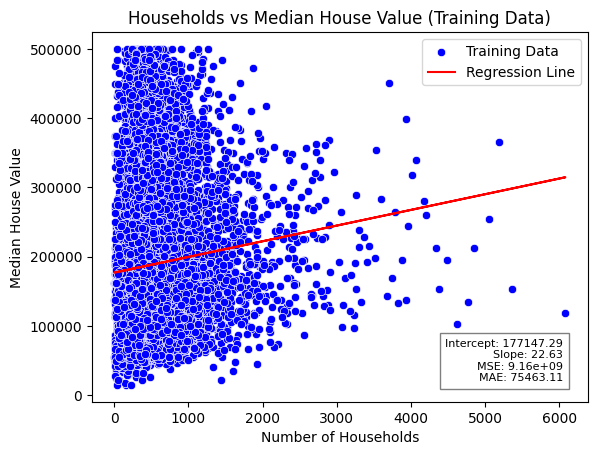

In [325]:
# Plotting the regression line on the training data
sns.scatterplot(x='households', y='median_house_value', data=train_data, color='blue', label='Training Data')
plt.plot(train_data['households'], y_train_pred_households, color='red', label='Regression Line')
plt.title("Households vs Median House Value (Training Data)")

# Prepare the text for annotation
annotation_text = (f'Intercept: {model_households.intercept_:.2f}\n'
                   f'Slope: {model_households.coef_[0]:.2f}\n'
                   f'MSE: {train_mse_households:.2e}\n'
                   f'MAE: {train_mae_households:.2f}')

# Add annotation to the plot
plt.text(0.95, 0.05, annotation_text, fontsize=8, ha='right', va='bottom', transform=plt.gca().transAxes, bbox=dict(facecolor='white', alpha=0.5))


plt.xlabel("Number of Households")
plt.ylabel("Median House Value")
plt.legend()
plt.show()

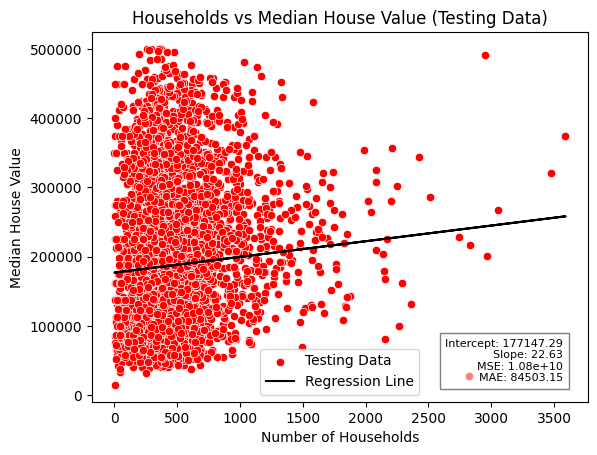

In [326]:
# Plotting the regression line on the test data
sns.scatterplot(x='households', y='median_house_value', data=test_data, color='red', label='Testing Data')
plt.plot(test_data['households'], y_test_pred_households, color='black', label='Regression Line')
plt.title("Households vs Median House Value (Testing Data)")

# Prepare the text for annotation
annotation_text = (f'Intercept: {model_households.intercept_:.2f}\n'
                   f'Slope: {model_households.coef_[0]:.2f}\n'
                   f'MSE: {test_mse_households:.2e}\n'
                   f'MAE: {test_mae_households:.2f}')

# Add annotation to the plot
plt.text(0.95, 0.05, annotation_text, fontsize=8, ha='right', va='bottom', transform=plt.gca().transAxes, bbox=dict(facecolor='white', alpha=0.5))

plt.xlabel("Number of Households")
plt.ylabel("Median House Value")
plt.legend()
plt.show()

## Step 7: Conclusion and Recommendations

### Conclusion

- **Median Income**: This model shows the strongest correlation with house values, with the lowest MSE (5.83 billion) and MAE (59,961.60). The positive slope indicates a strong positive relationship between income and house prices. This variable captures a significant portion of the variance in house prices.

- **Population**: This model appears to be the weakest predictor, with a low positive slope and the highest MSE (10.86 billion). Despite its potential connection to housing demand, population size does not seem to directly influence prices in this dataset.

- **Households**: While the slope is positive, the model has a high error (MSE: 10.76 billion, MAE: 84,503.15), indicating that it doesn’t capture the variability in house prices as well as **median income**. Households alone may not capture the complexity of pricing trends.

### Recommendation

The data strongly supports using **median income** as the most reliable predictor for house prices. Population and household counts, while valuable, do not provide as much predictive power. For future models and analysis, focusing on income-related variables would provide better accuracy and insights into housing price predictions.

### Thank you 😊